In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
train=pd.read_csv("loan_prediction.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [56]:

train.shape

(614, 13)

In [57]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [58]:

train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

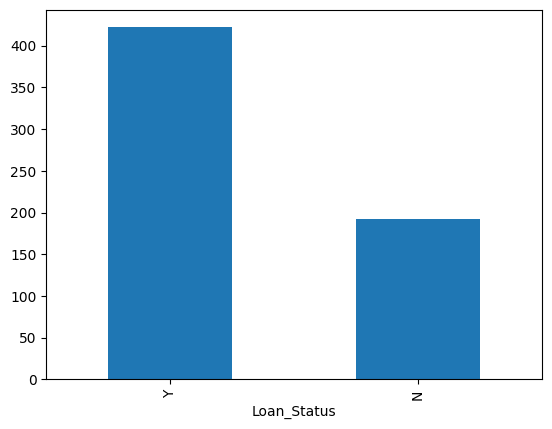

In [59]:
train['Loan_Status'].value_counts().plot.bar()

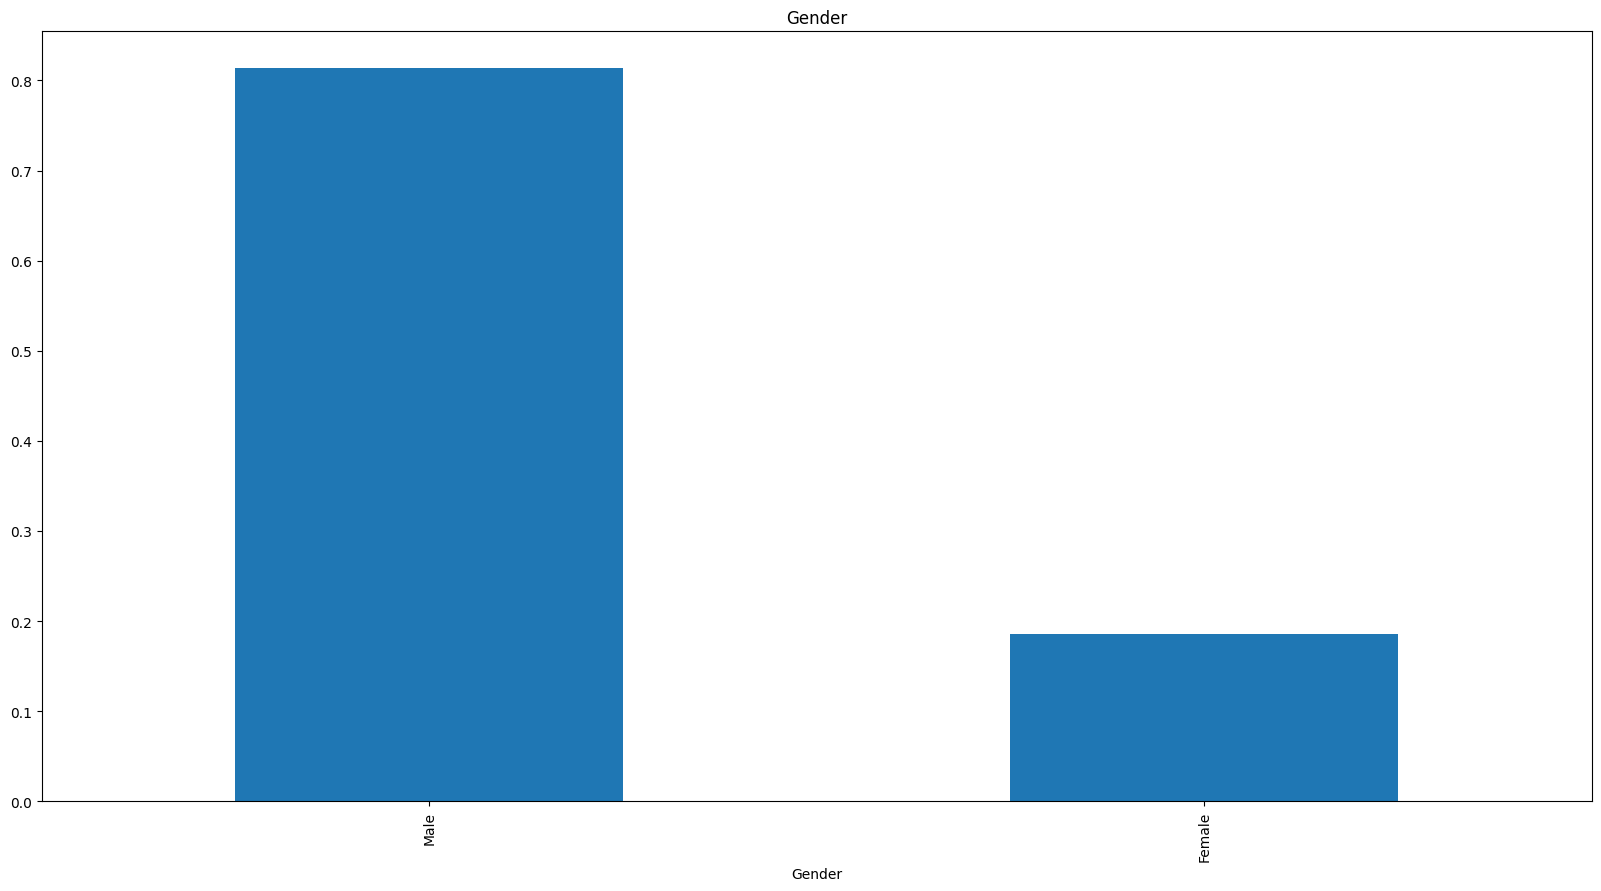

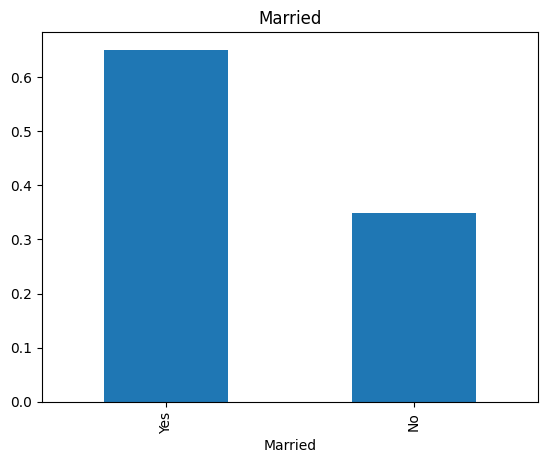

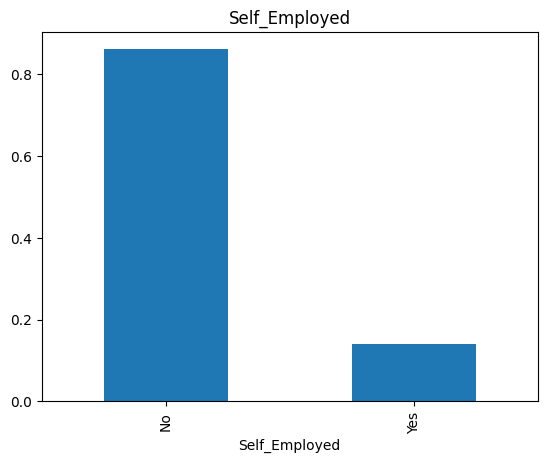

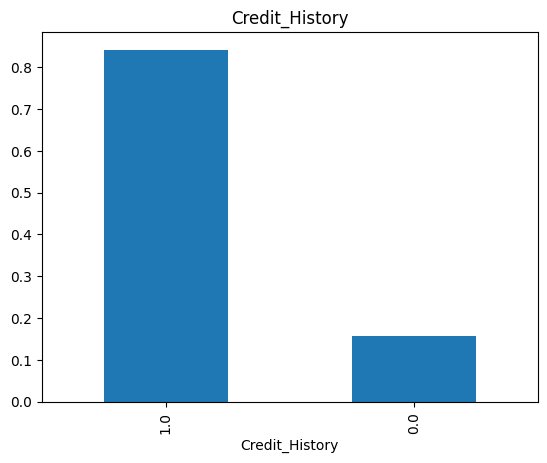

In [60]:

train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

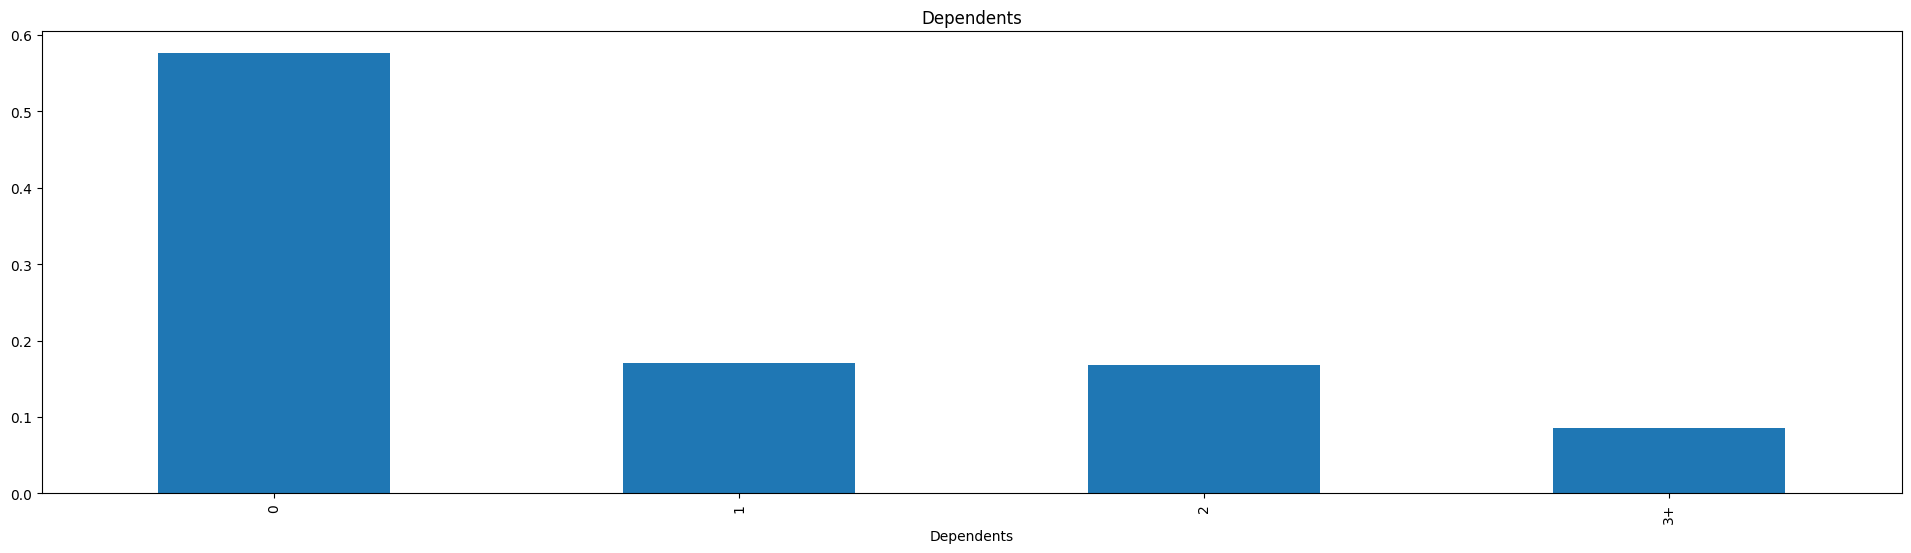

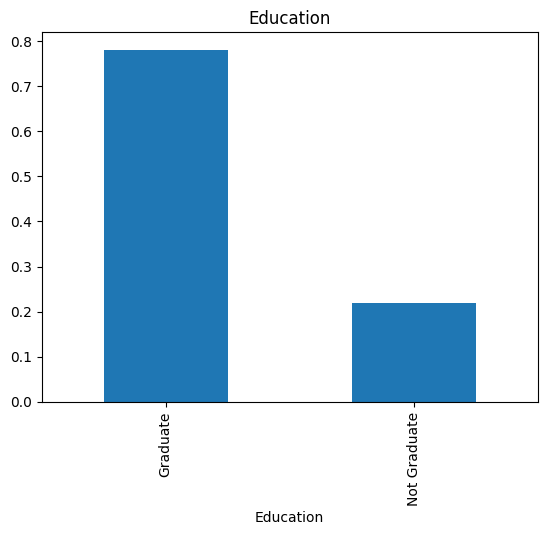

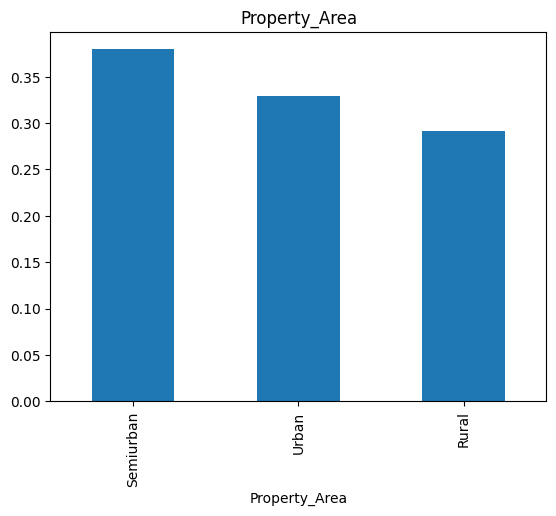

In [61]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

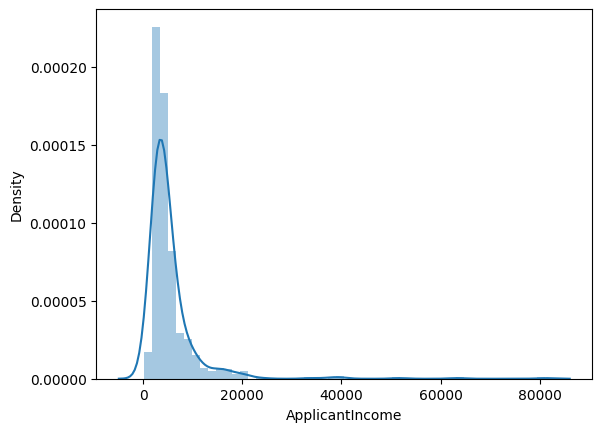

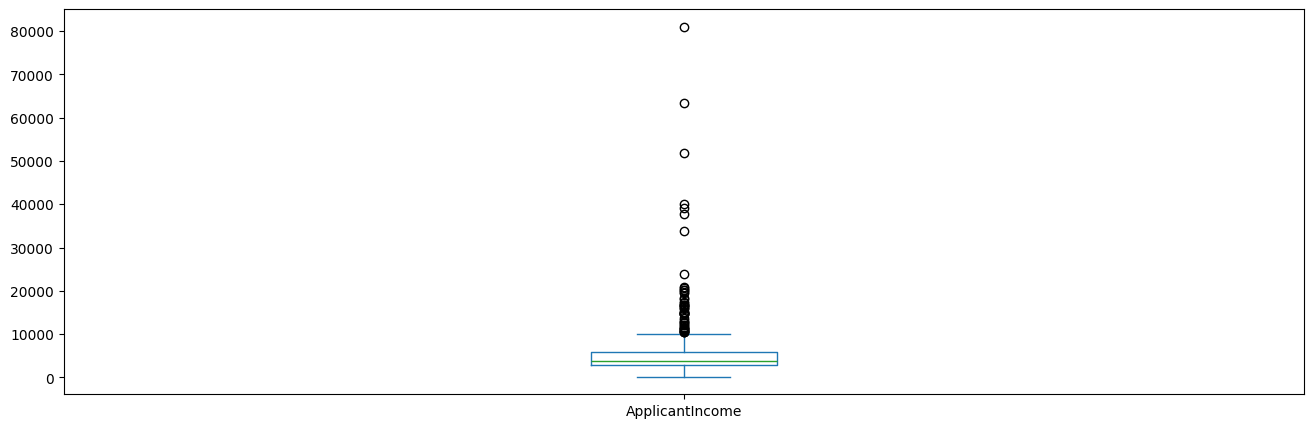

In [62]:

sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

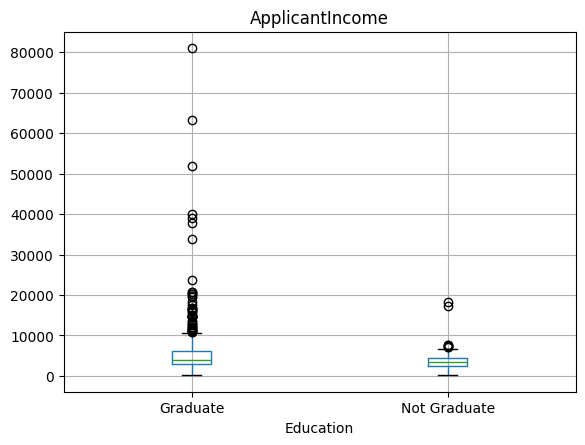

In [63]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

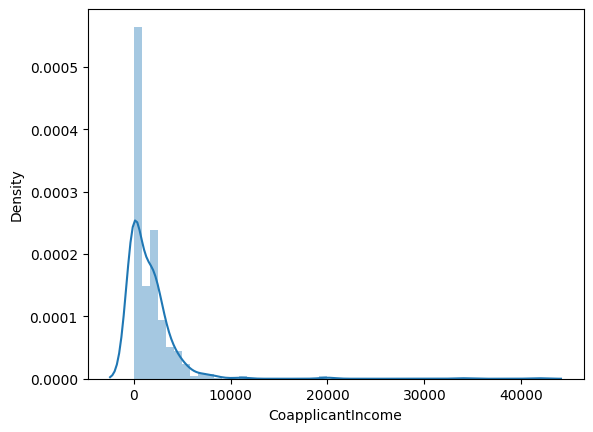

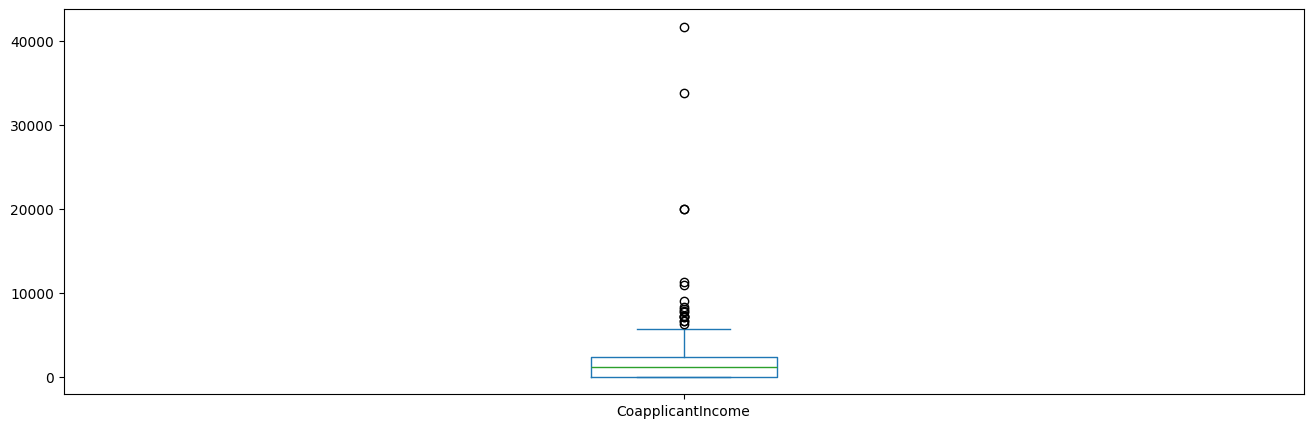

In [64]:

sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

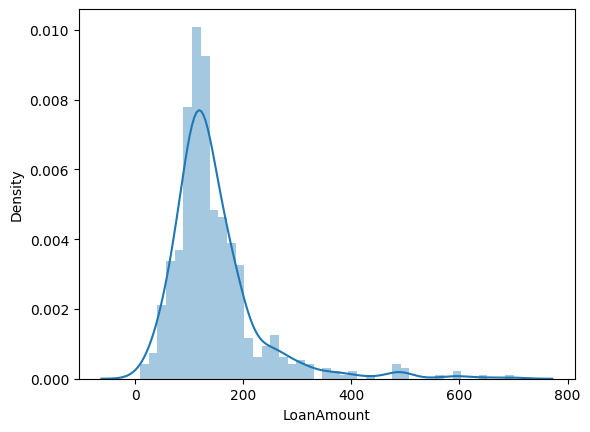

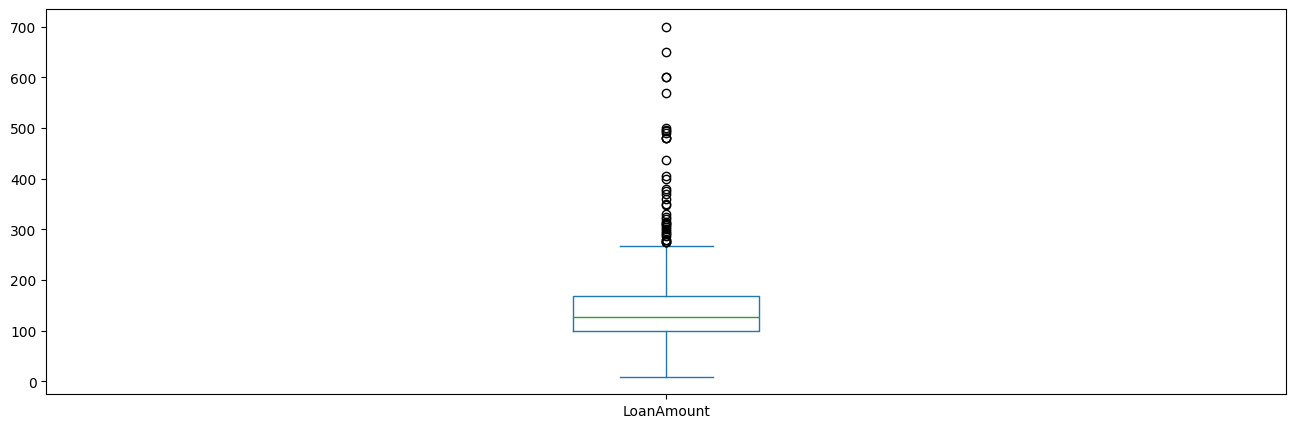

In [65]:
train.notna()
# train.dropna()
# print(train[train['LoanAmount'].isnull()])
# train['LoanAmount'] = pd.to_numeric(train['LoanAmount'], errors='coerce')
# train = train.dropna(subset=['LoanAmount'])
# train['LoanAmount'] = train['LoanAmount'].astype(int)
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

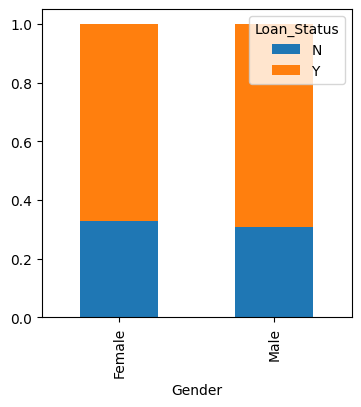

In [66]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

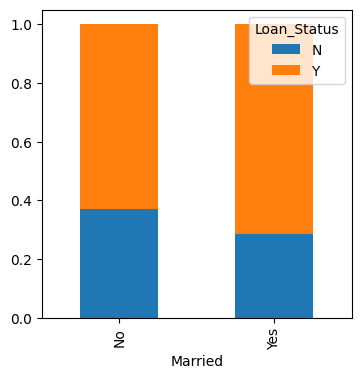

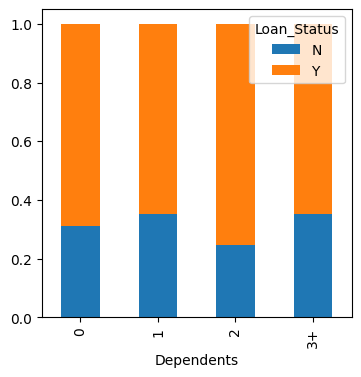

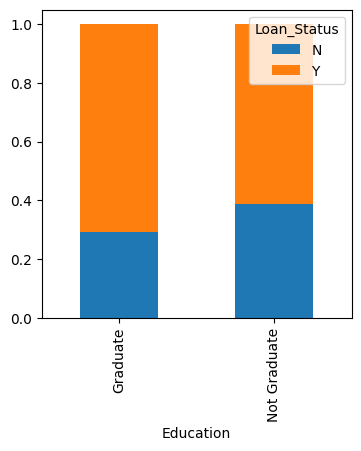

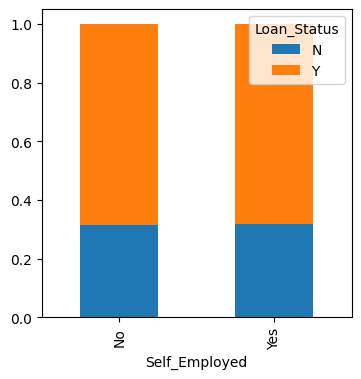

In [67]:

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

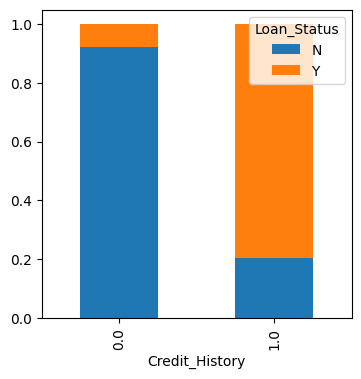

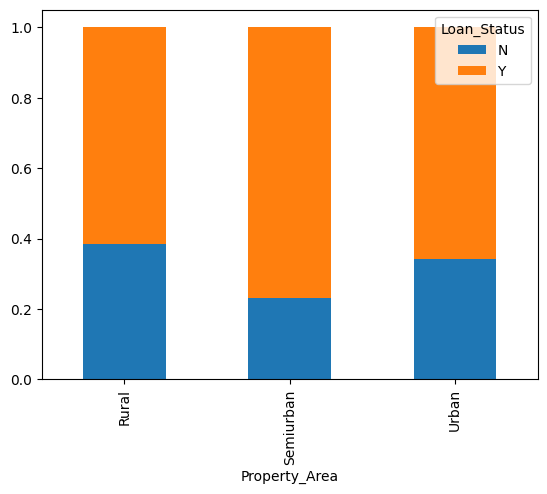

In [68]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

<Axes: xlabel='Loan_Status'>

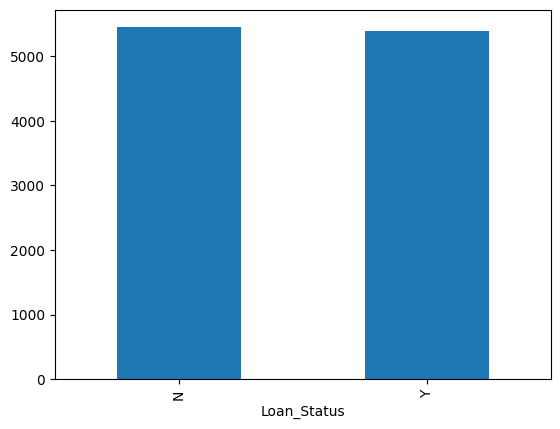

In [69]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

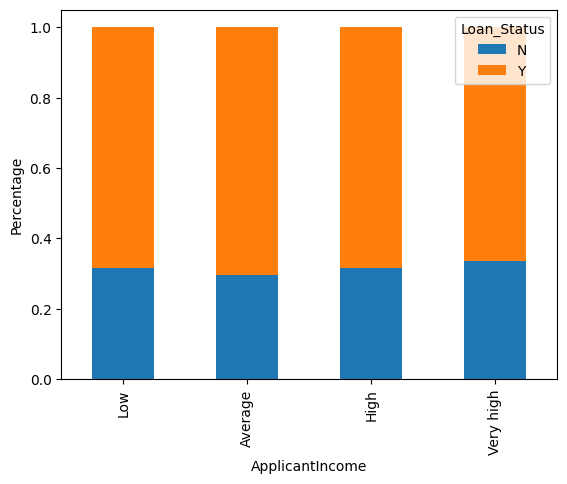

In [70]:

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

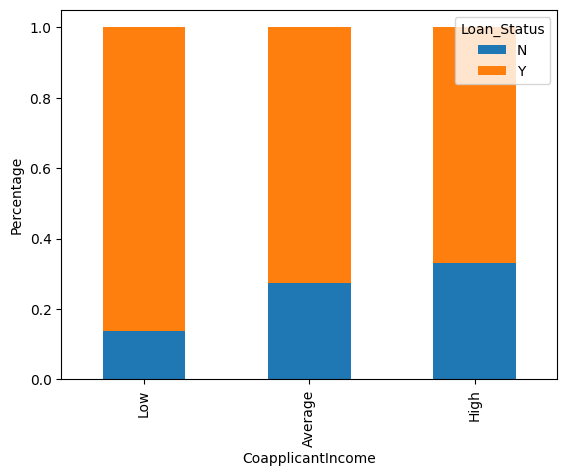

In [71]:

bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

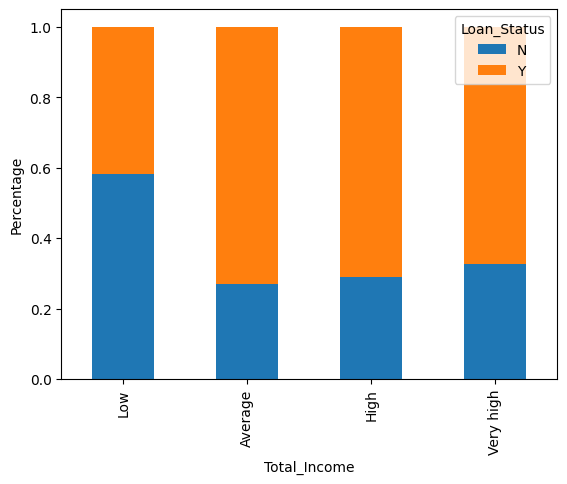

In [72]:

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

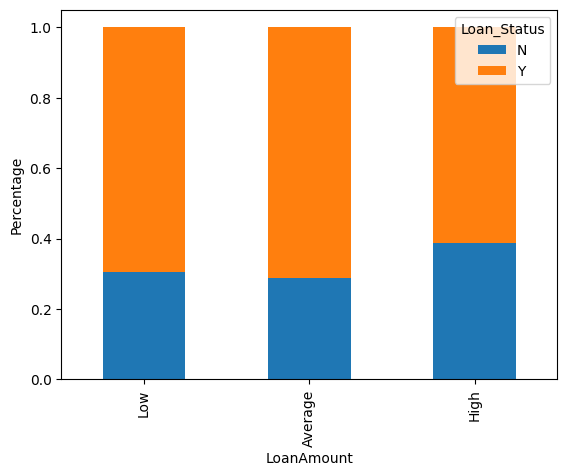

In [73]:

bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [74]:
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_bin Coapplicant_Income_bin  \
0             1.0         Urban           Y       High                    NaN

In [75]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [76]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [77]:
print(train.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [78]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [79]:
train=train.drop(['Loan_ID'], axis=1)

In [80]:
train['Married'] = train['Married'].astype(str)
train['Gender'] = train['Gender'].astype(str)
train['Self_Employed'] = train['Self_Employed'].astype(str)
train['Property_Area'] = train['Property_Area'].astype(str)
train['Education'] = train['Education'].astype(str)
train['Loan_Status'] = train['Loan_Status'].astype(str)
train['Dependents'] = train['Dependents'].astype(str)

In [81]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Replace categorical values with encoded values
train['Married'] = label_encoder.fit_transform(train['Married'])
train['Gender'] = label_encoder.fit_transform(train['Gender'])
train['Self_Employed'] = label_encoder.fit_transform(train['Self_Employed'])
train['Property_Area'] = label_encoder.fit_transform(train['Property_Area'])
train['Education'] = label_encoder.fit_transform(train['Education'])
train['Loan_Status'] = label_encoder.fit_transform(train['Loan_Status'])
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])

In [82]:
print(train.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

<Axes: >

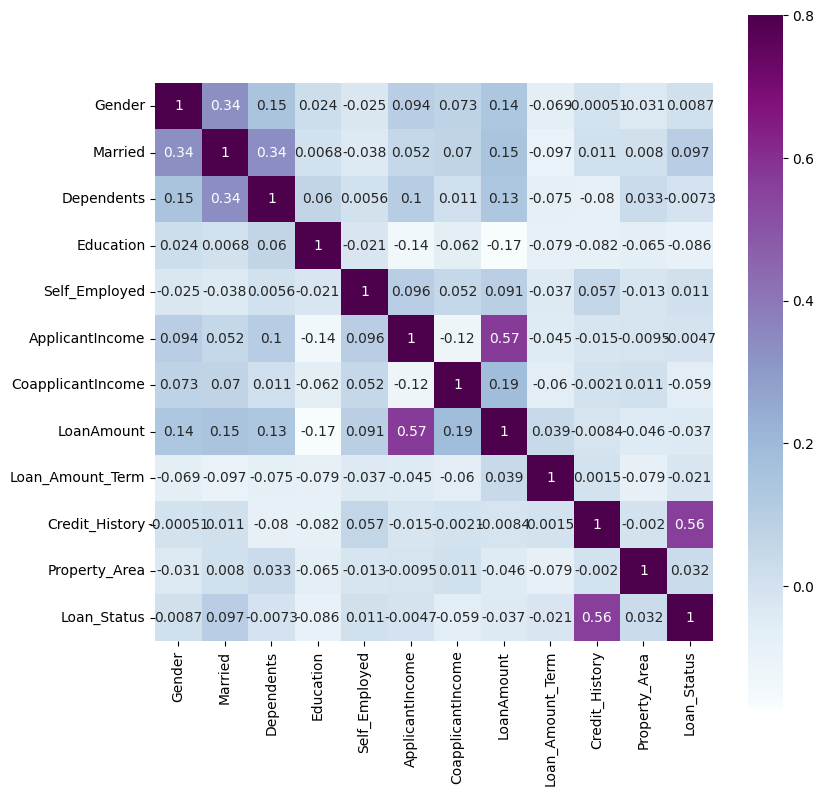

In [83]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [84]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
train['Gender'].fillna(train['LoanAmount'].mode()[0], inplace=True)
train['Married'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [86]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [87]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [88]:
train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace=True)

In [90]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [91]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

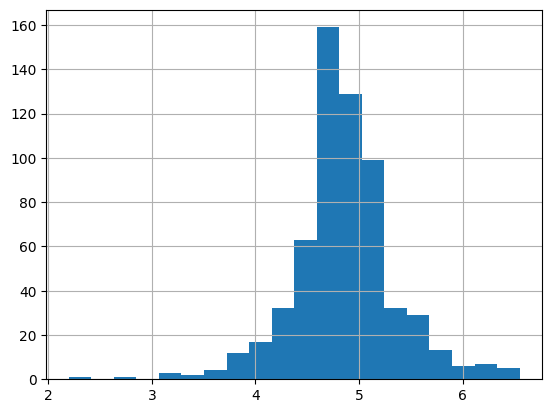

In [92]:
# outlier
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)


<Axes: >

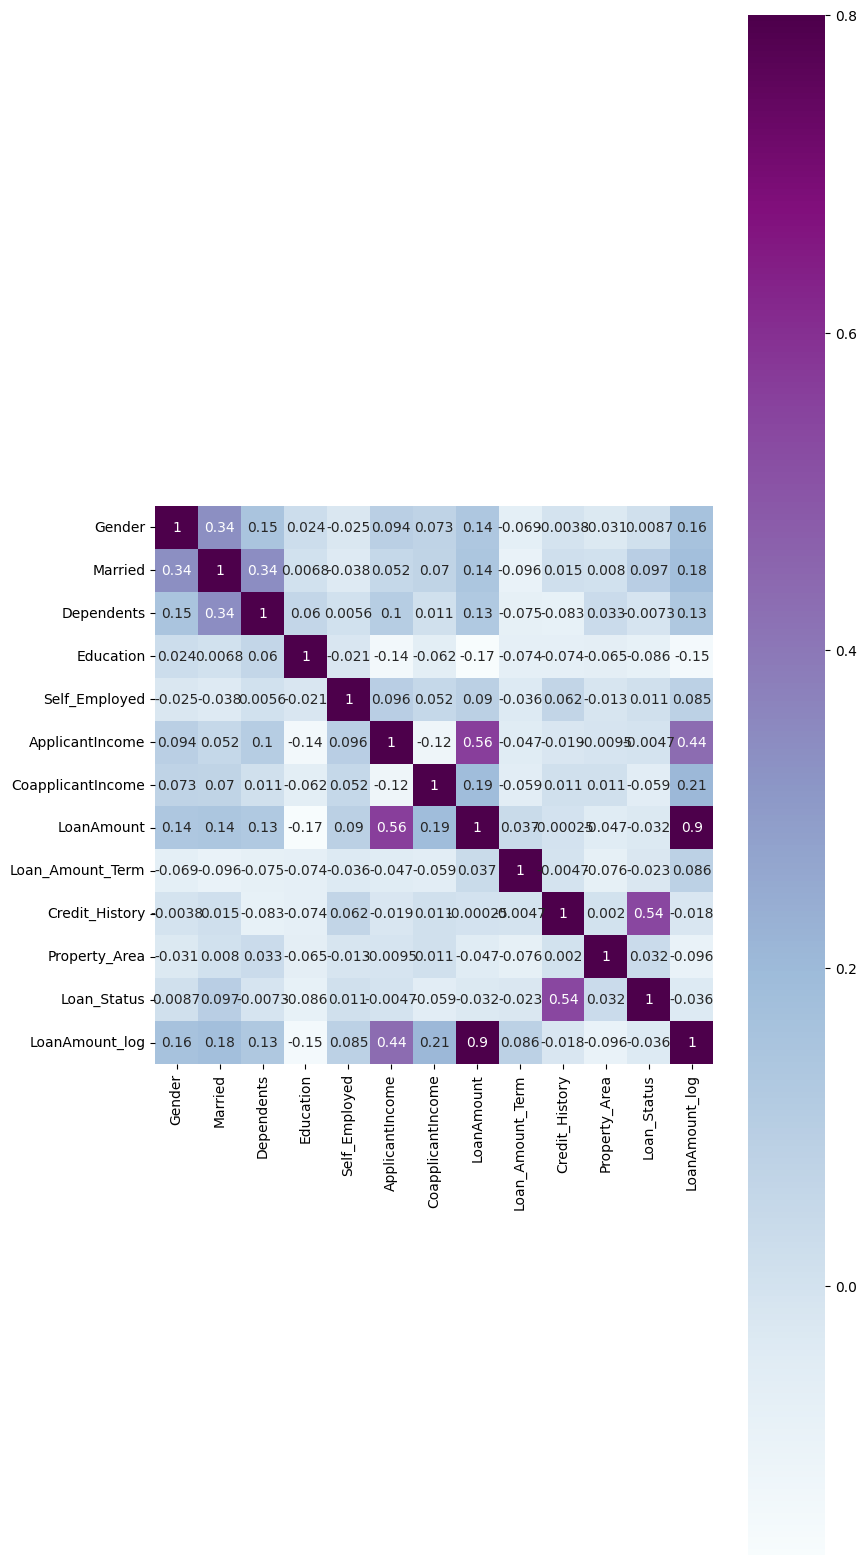

In [93]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [94]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
dtype: object

In [95]:
X = train.drop(columns = ['Loan_Status'],axis = 1)
y = train['Loan_Status']

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [99]:
print(train.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       120.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  LoanAmount_log  
0              2            1        4.787492  
1              0    

In [100]:
if train.isnull().any().any():
    print("DataFrame contains missing values")
else:
    print("DataFrame does not contain missing values")

DataFrame does not contain missing values


In [101]:

from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [102]:
class Logistic_Regression:
    #The constructor of LogisticRegression class initializes the learning rate and number of iterations with 
    #default arguments lr=0.01 and n_iters=10000
    def __init__(self, lr=0.015, n_iters=10_000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None  # Initialize weights attribute to None

        
    #Implementation of sigmoid Activation Function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    
    #The fit method accepts the training data and actual classes as X and y respectively.
    #The data type of X and y should also be numpy.ndarray
    def fit(self, X, y):
        # Convert X and y to numpy arrays if they are not already
        X = np.array(X)
        y = np.array(y)

        #n_samples = number of training data points
        #n_features = number of features the training data has
        n_samples, n_features = X.shape

        # Initialize the weights with small random values
        self.weights = np.random.randn(n_features) * 0.1

        # Initialize the bias with 0
        self.bias = 0
        
        for i in range(self.n_iters):
            #using the y = wx + b equation to predict the linear predictions of the training data
            linear_predictions = np.dot(X, self.weights) + self.bias
            
            #passing the linear_predictions to the sigmoid activation function to calculate probabilities
            sigmoid_predictions = self.sigmoid(linear_predictions)

            #Calculating and minimizing the loss with standard gradient descent algorithm
            if not i % np.ceil(0.1 * self.n_iters):
                loss = self.__Loss(y, sigmoid_predictions)
                class_pred = self.__converter(sigmoid_predictions)
                acc = self.Accuracy(y, class_pred)

                # #Display the Losses and accuracy for every 10% of of the number of total iterations               
                # print('----------------------------------------------------------------------------------')
                # print(f'Fitting...Iteration {i}....Loss:{loss}.....Accuracy:{acc}')
                # print('----------------------------------------------------------------------------------')

            #Calculating the gradient
            dw = (1/n_samples) * np.dot(X.T, sigmoid_predictions-y)
            db = (1/n_samples) * np.sum(sigmoid_predictions-y)

            #adjusting the weights and biases
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        return self.weights, self.bias

    #After adjusting the weights and biases, the predict method accepts the input (X) in the form of
    #numpy.ndarray and outputs the class_pred variable that holds the predicted output

    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_predictions)

        #If the sigmoid function returns values >=0.5 then we classify it as 1
        #else we classify it as 0 
        class_pred = self.__converter(y_pred)
        return class_pred

    def predict_for_one(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_predictions)
        class_pred = [1 if y_pred >= 0.5 else 0]
        return class_pred
    
    #The converter method turns probabilities into classes
    def __converter(self, y_pred):
        class_pred = [1 if y>=0.5 else 0 for y in y_pred]
        return np.array(class_pred)
    

    #Calculate the log loss for given probabilities and actual classes and return the loss
    def __Loss(self, y_true, y_pred):
        log_loss = 0
        for i in range(len(y_true)):
            y = y_true[i]
            p = y_pred[i]
            log_loss += -(y * np.log(p) + (1 - y) * np.log(1 - p))
        return log_loss / len(y_true)

    #Calculate the accuracy of the model
    def Accuracy(self, y_true, y_pred):
        return np.sum(y_pred == y_true) / len(y_pred)

    
    #Display Confusion Matrix as
    # 
    #     [tp fn]
    #     [fp tn]
    # 
    def ConfusionMatrix(self, y_true, y_pred):
        tp = fp = fn = tn = 0

        for pair in zip(y_true, y_pred):
            if pair == (1,1):
                tp+=1

            elif pair == (1,0):
                fn+=1

            elif pair ==(0,1):
                fp+=1

            else:
                tn+=1
                
        # return np.array([tp,fn,fp,tn]).reshape(2,2)